### imports ###

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
def source_module(module_file: str, local_module_name: str = None):
    import importlib
    """to add a module from a user defined python script into the local name space"""
    if local_module_name is None:
        local_module_name = module_file.split("/")[-1].replace(".py", "")
    if len(module_file.split("/")) == 1 or module_file.split("/")[-2] == ".":
        module_dir = os.getcwd()
    else:
        module_dir = "/".join(module_file.split("/")[:-1])
    sys.path.insert(0, module_dir)
    module = importlib.import_module(module_file.split("/")[-1].replace(".py", ""))
    g = globals()
    g[local_module_name] = module
    pass

# importing a python script where I keep a lot of the basic functions I use!
source_module("/Users/anjalidhar/Desktop/Packages/mdtools.py")

### figure functions ###

In [7]:
def get_contacts(matdir): 
    """ Will return a dictionary object of the various contact types contained in the provided directory. """
    filt = lambda string: '.npy' in string
    contact_files = list(filter(filt, [f'{matdir}/{item}' for item in os.listdir(matdir)]))
    run = {}
    
    for file in contact_files:
        # grab the contact type 
        name = file.split('/')[-1].split('.')[0]
        # save it as that key in the dictionary
        run[name] = np.load(file)
        
    return run

In [8]:
def subplot_snsheat(data, ax=None, cbar=False, cbar_ax=None):
    from numpy import ndarray
    import seaborn as sns
    if type(data) is ndarray:
        if ax is None:
            ax = plt.gca()
        plot = sns.heatmap(data, cmap='jet', vmin=0,vmax=.5,ax=ax, cbar=cbar, cbar_ax=None if not cbar else cbar_ax)
        return plot
    else: pass
        
def plot_dualres_corr(rundir, corr_rundir, res_sequence=['ASP121', '', 'GLU123', '', 'TYR125', '', 'MET127', '', 'SER129', 
                                                         '', 'GLU131', '', 'TYR133', '', 'ASP135', '', 'GLU137', '', 
                                                         'GLU139', 'ALA140']): 
    n_residues=len(res_sequence)

    # Getting names and loading contacts: 
    run_name, corr_run_name = rundir.split('/')[-1], corr_rundir.split('/')[-1]
    contacts={}
    contacts[run_name]=get_contacts(rundir)
    contacts[corr_run_name]=get_contacts(corr_rundir)

    # Initializing figure
    fig, axes = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(22, 15))
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    corrs = []

    # Now, going through the clusters... 
    for i, ax in enumerate(axes.flat):
        cb = i==1
        
        # plotting:
        corr = pearsonr(contacts[run_name]['dual'][i][:n_residues,:n_residues].flat, contacts[corr_run_name]['dual'][i].flat)[0]
        corrs.append(corr)
        subplot_snsheat(contacts[run_name]['dual'][i][:n_residues,:n_residues], ax=ax, cbar=cb, cbar_ax=cbar_ax) 
        
        # aesthetics: 
        ax.set_title(f'Cluster {i}, r={corr:.2f}',size=15)
        ax.set_xticks(range(n_residues), res_sequence, rotation=45, size=14)
        ax.set_yticks(range(n_residues), res_sequence, rotation=45, size=14)
        ax.invert_yaxis()

    # And then displaying the average correlation value across all clusters
    avg_corr = np.mean(corrs)
    fig.suptitle(fr'Dual Residue Contacts for {labels[run_name]}, with Corr to {corr_run_name} ($\bar r$={avg_corr:.2f})', fontsize=30)

In [14]:
def plot_dualres(rundir, res_sequence=['ASP121', '', 'GLU123', '', 'TYR125', '', 'MET127', '', 'SER129', 
                                       '', 'GLU131', '', 'TYR133', '', 'ASP135', '', 'GLU137', '', 
                                       'GLU139', 'ALA140']): 
    n_residues=len(res_sequence)

    # Getting names and loading contacts: 
    run_name = rundir.split('/')[-1]
    contacts={}
    contacts[run_name]=get_contacts(rundir)

    # Initializing figure
    fig, axes = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(22, 15))
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    # Now, going through the clusters... 
    for i, ax in enumerate(axes.flat):
        cb = i==1
        # plotting:
        subplot_snsheat(contacts[run_name]['dual'][i][:n_residues,:n_residues], ax=ax, cbar=cb, cbar_ax=cbar_ax) 
        
        # aesthetics: 
        ax.set_title(f'Cluster {i}',size=15)
        ax.set_xticks(range(n_residues), res_sequence, rotation=45, size=14)
        ax.set_yticks(range(n_residues), res_sequence, rotation=45, size=14)
        ax.invert_yaxis()

    fig.suptitle(fr'Dual Residue Contacts for {run_name}', fontsize=30)

## figures! ##

In [4]:
# Directory where I've stored my contact matrices for all my runs: 
rundir = '/Users/anjalidhar/Desktop/autodock/contact_matrices'
# The labels that transform my keys into something more accessible
labels = mdtools.load_dict(f'/Users/anjalidhar/Desktop/Packages/run_label_dict')

### Ligand 41 ###

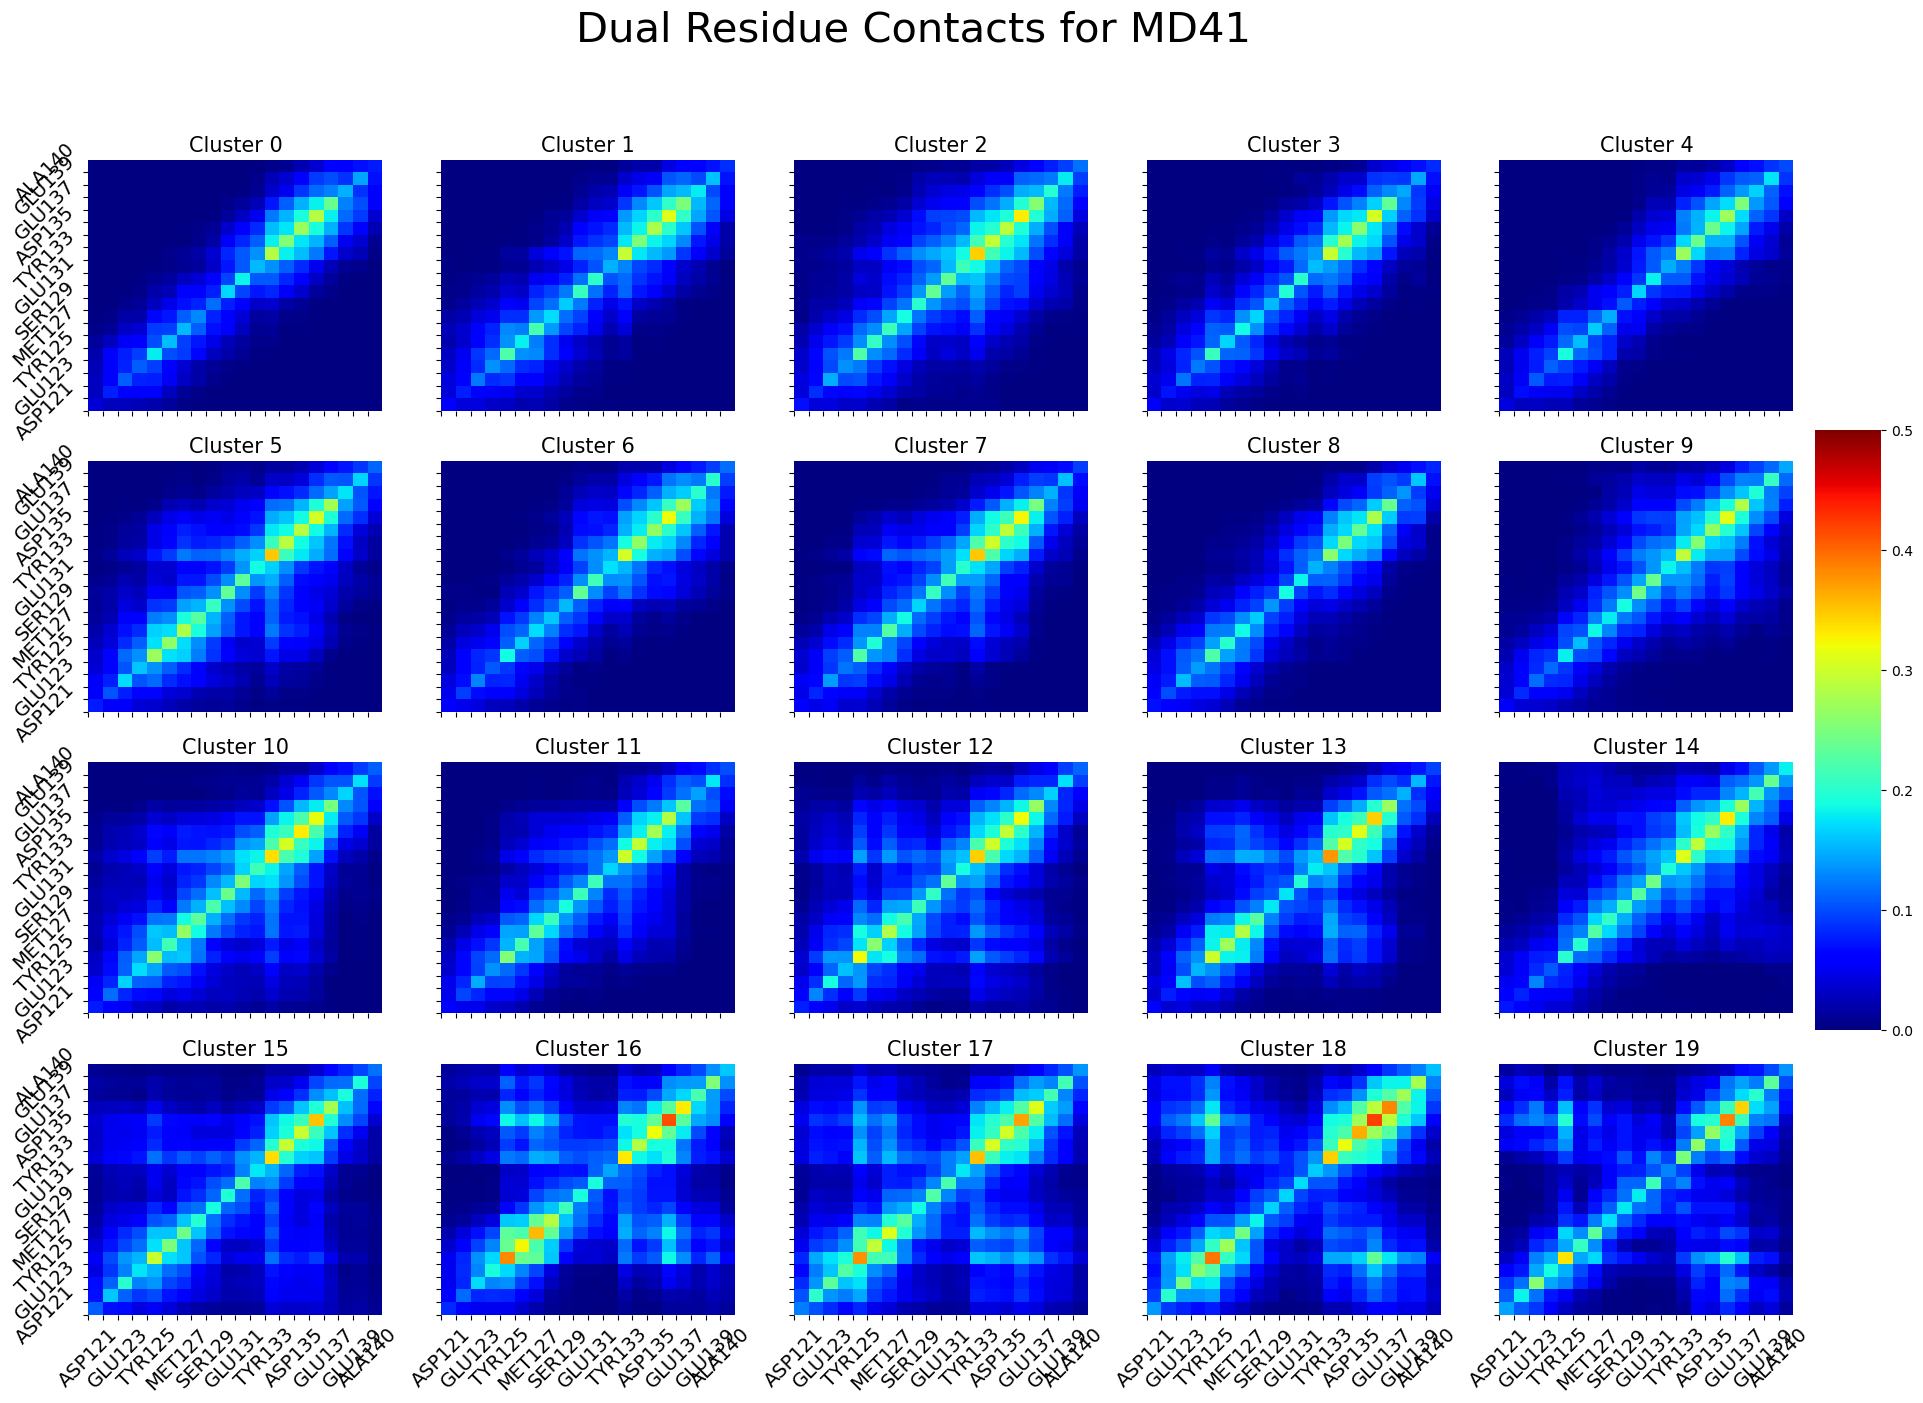

In [20]:
plot_dualres(f'{rundir}/MD41')

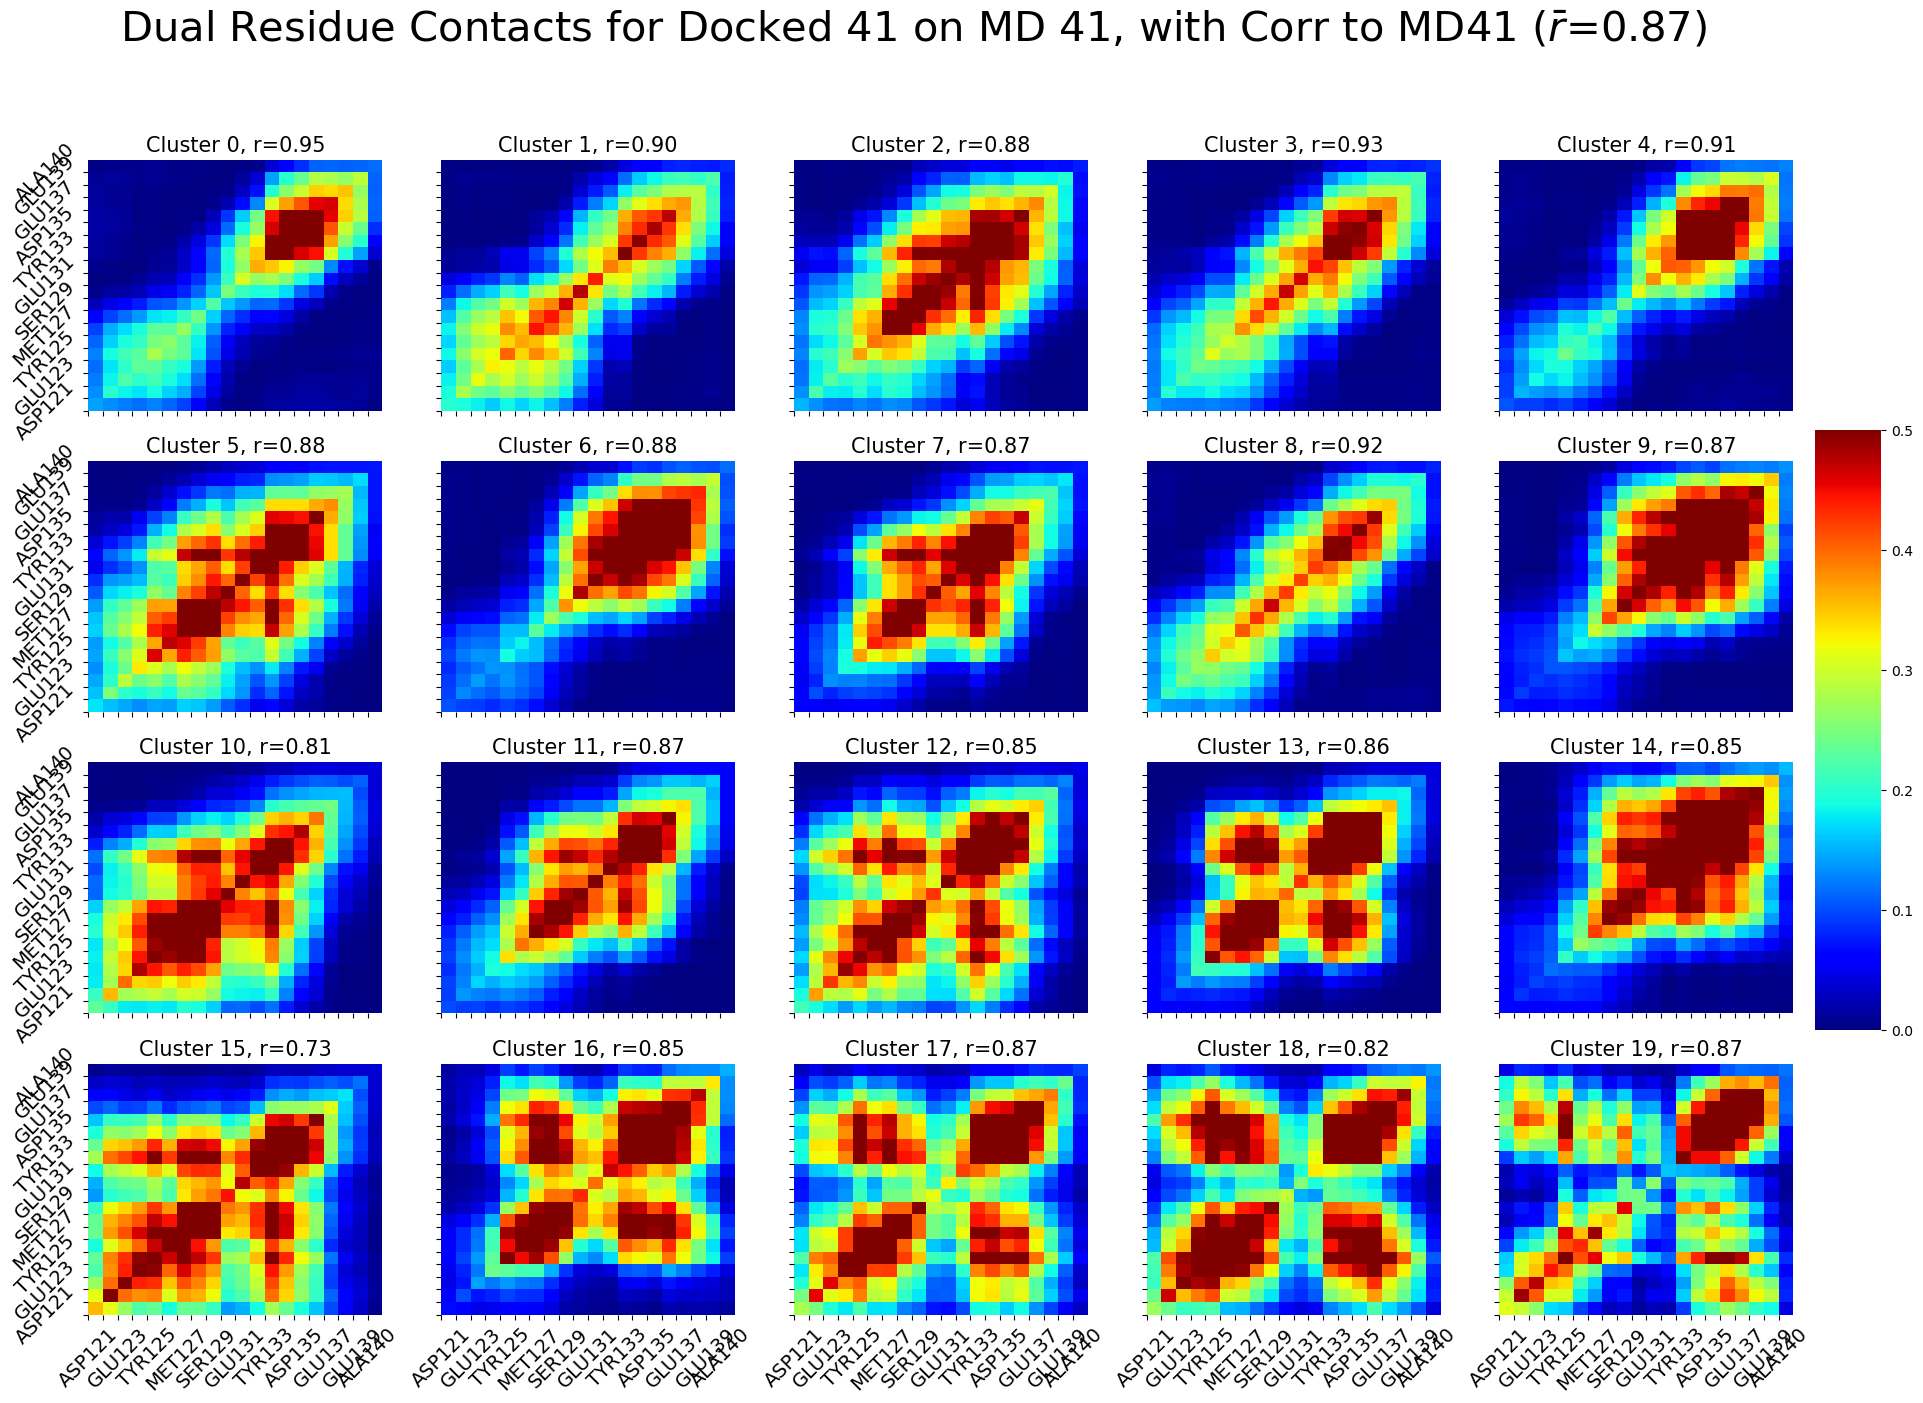

In [9]:
plot_dualres_corr(f'{rundir}/41on41bf', f'{rundir}/MD41')

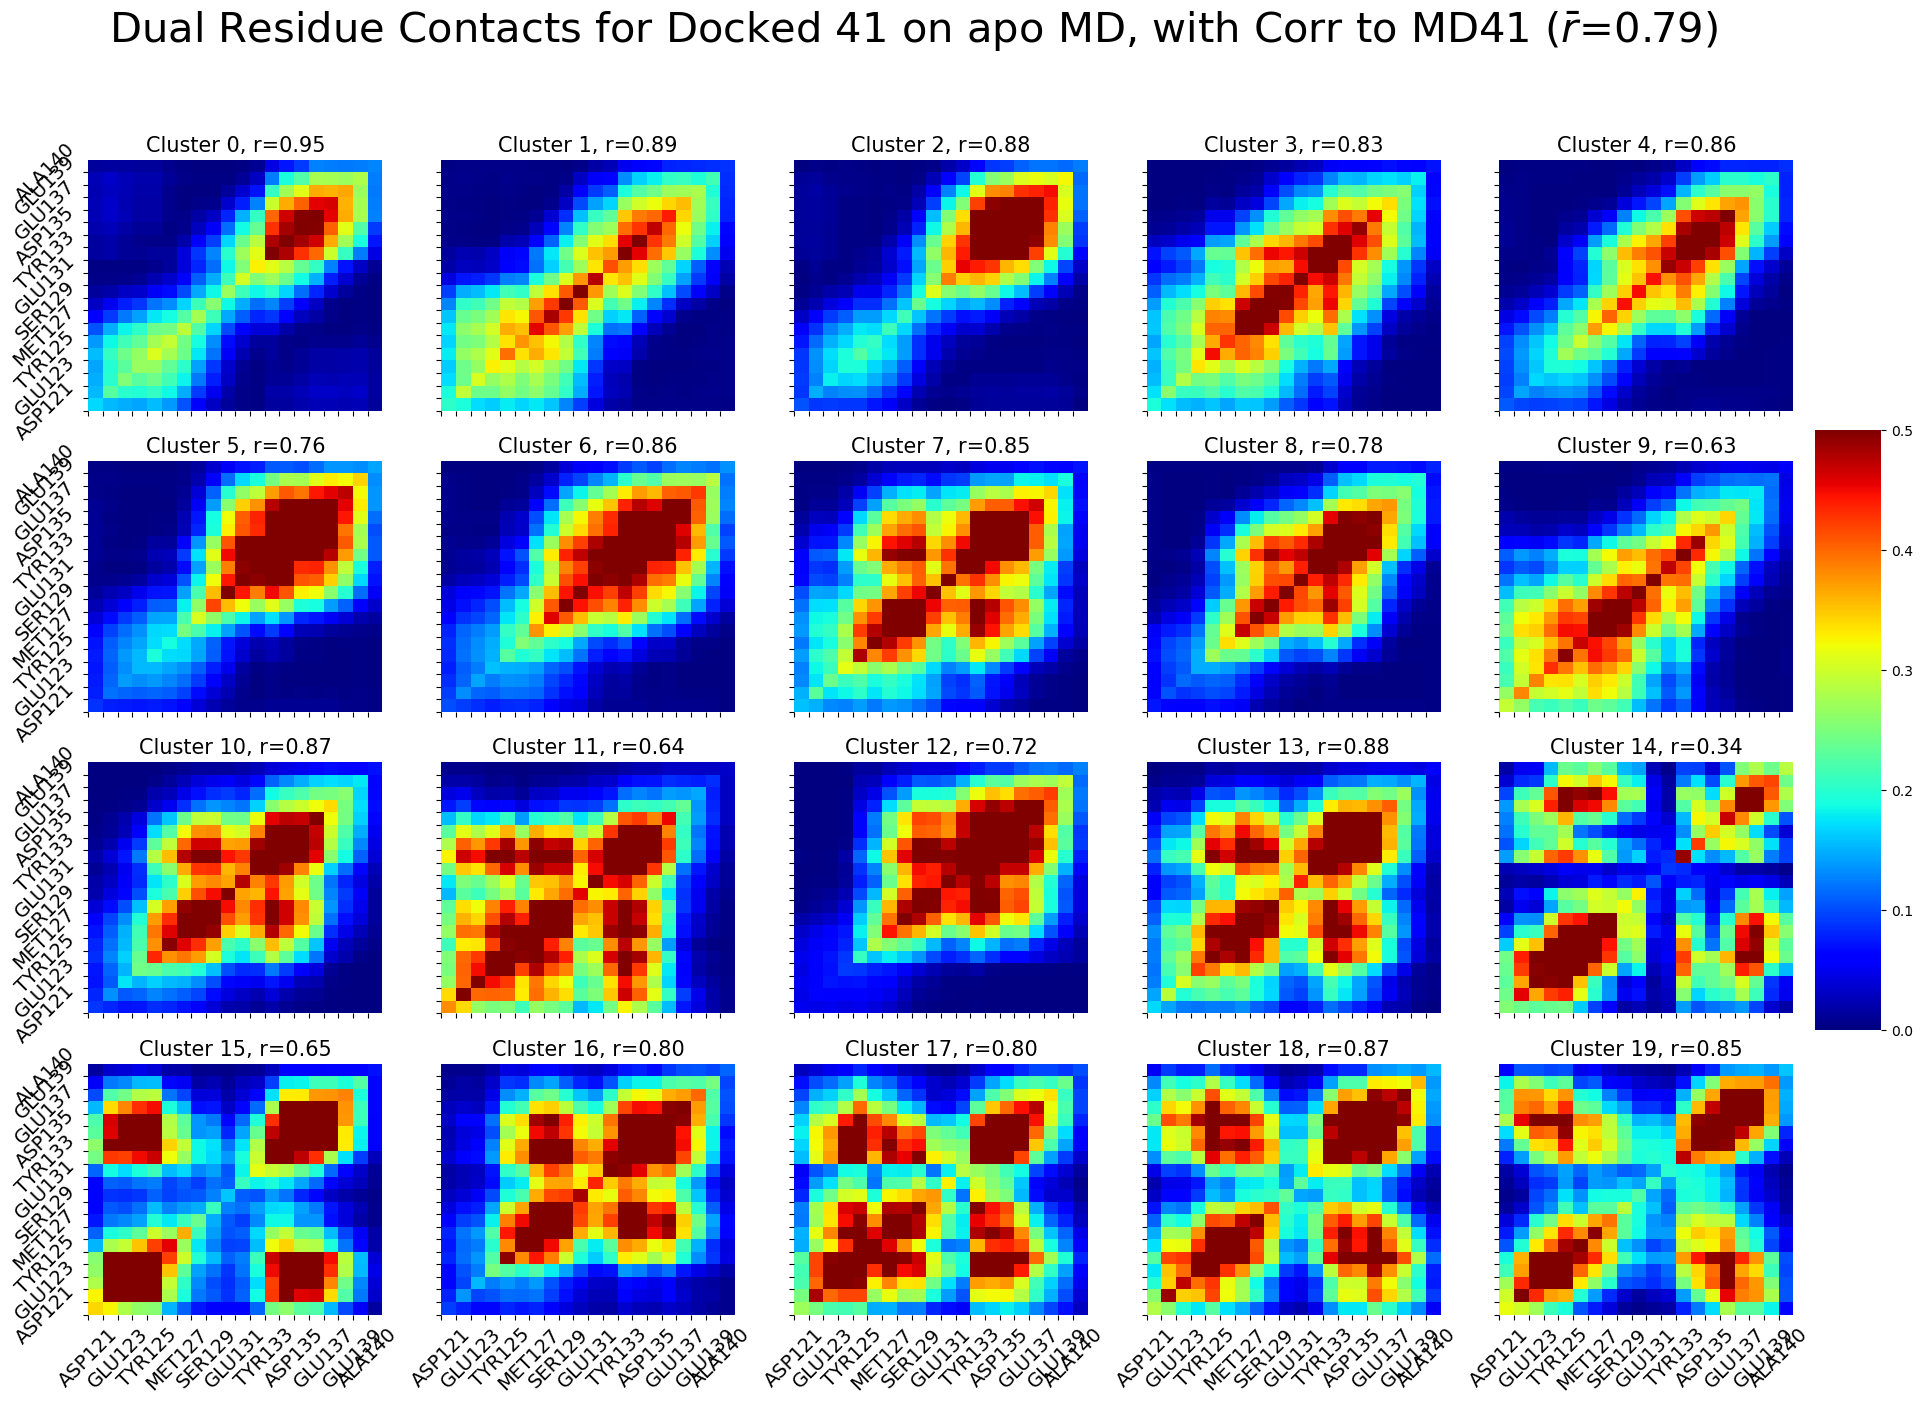

In [10]:
plot_dualres_corr(f'{rundir}/41onapo', f'{rundir}/MD41')

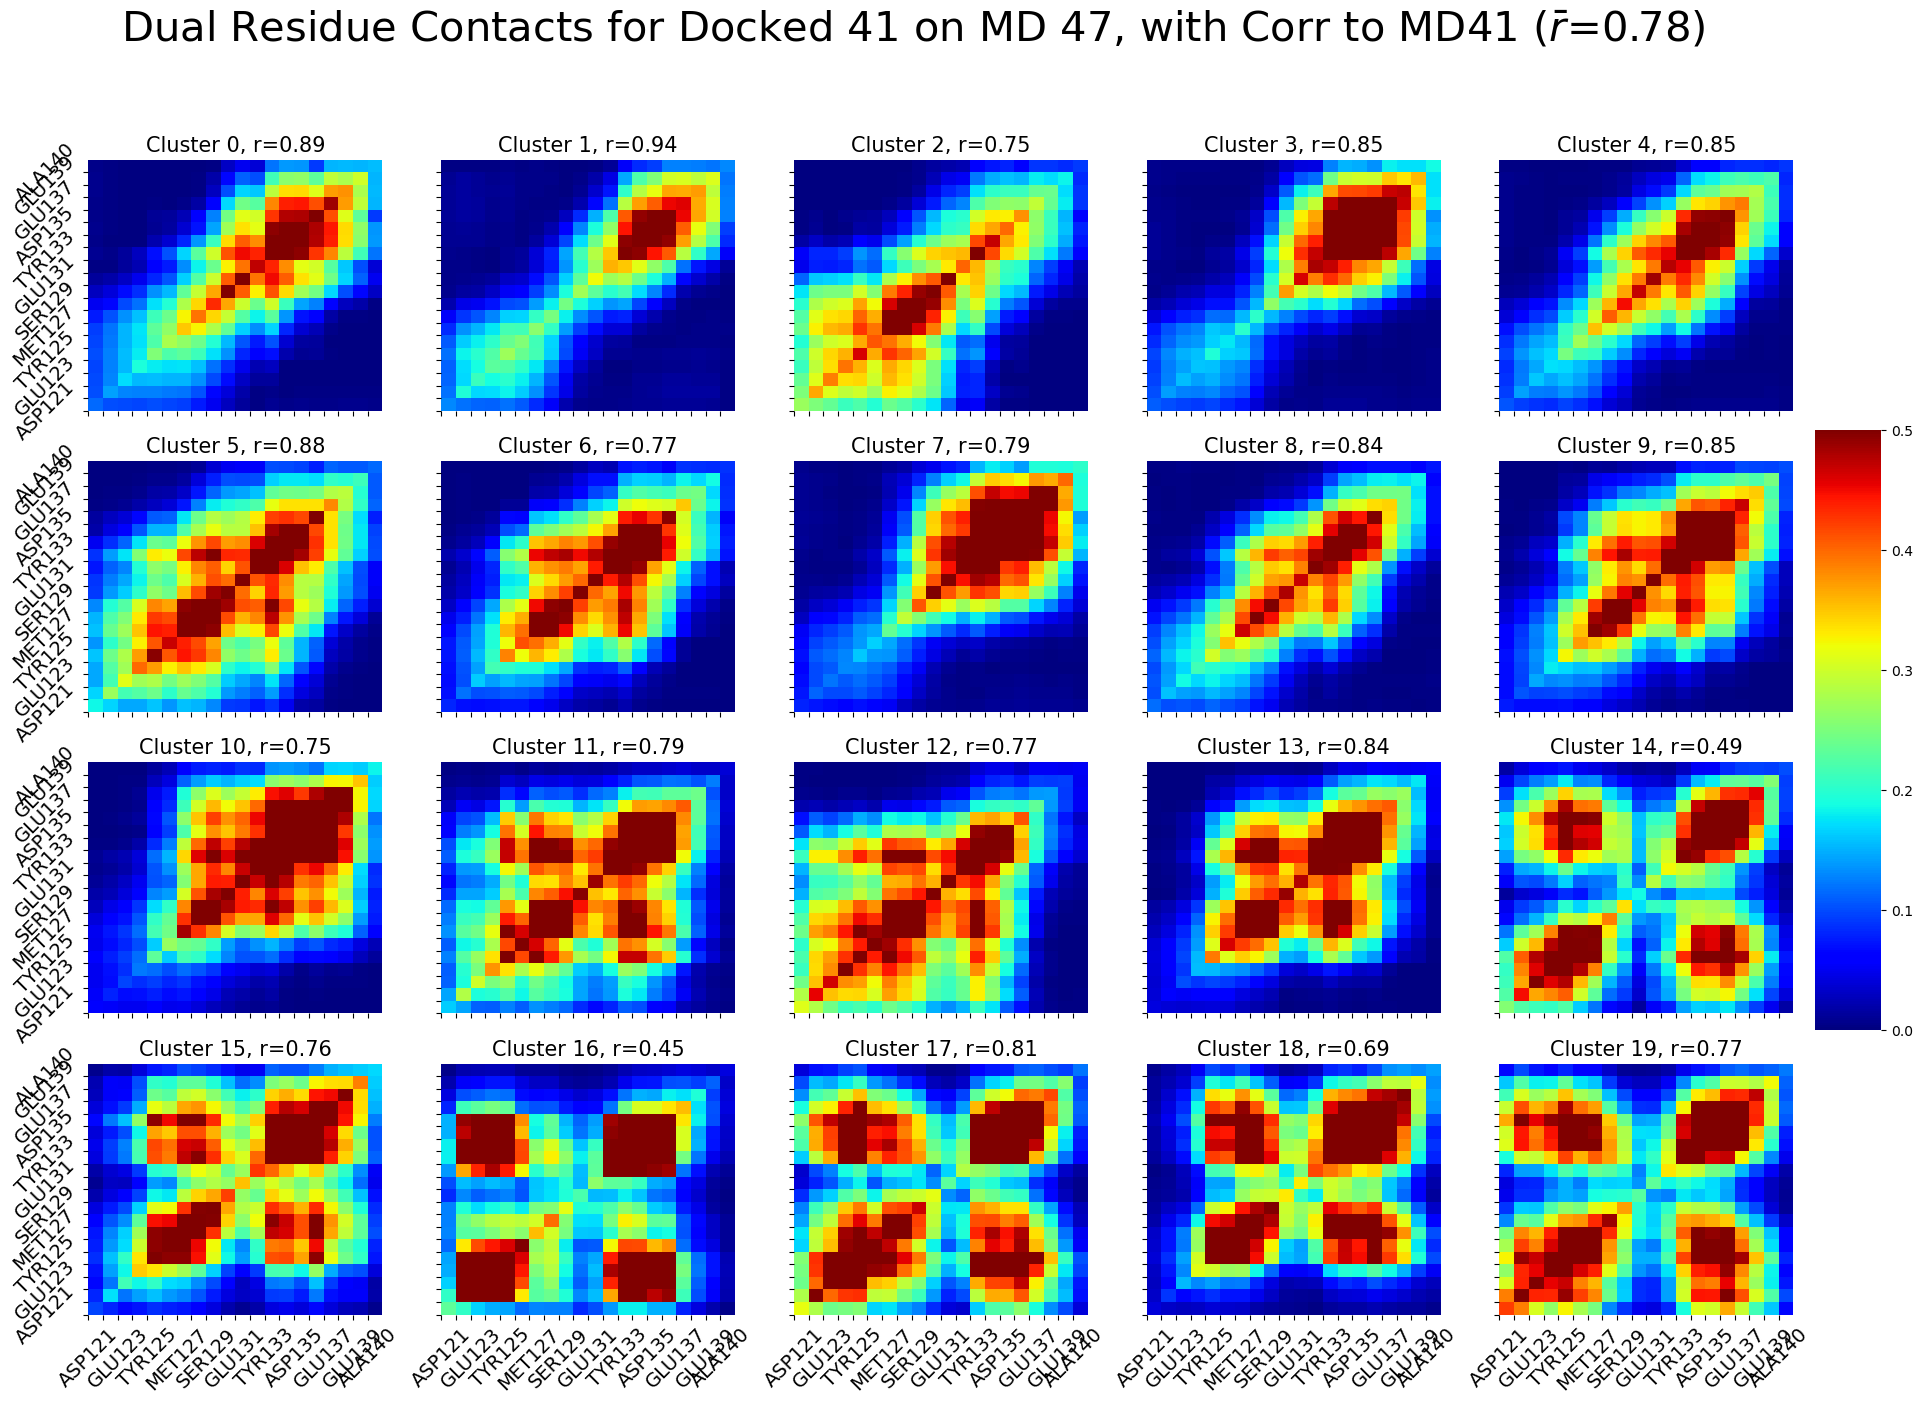

In [11]:
plot_dualres_corr(f'{rundir}/41on47bf', f'{rundir}/MD41')

### Ligand 47 ###

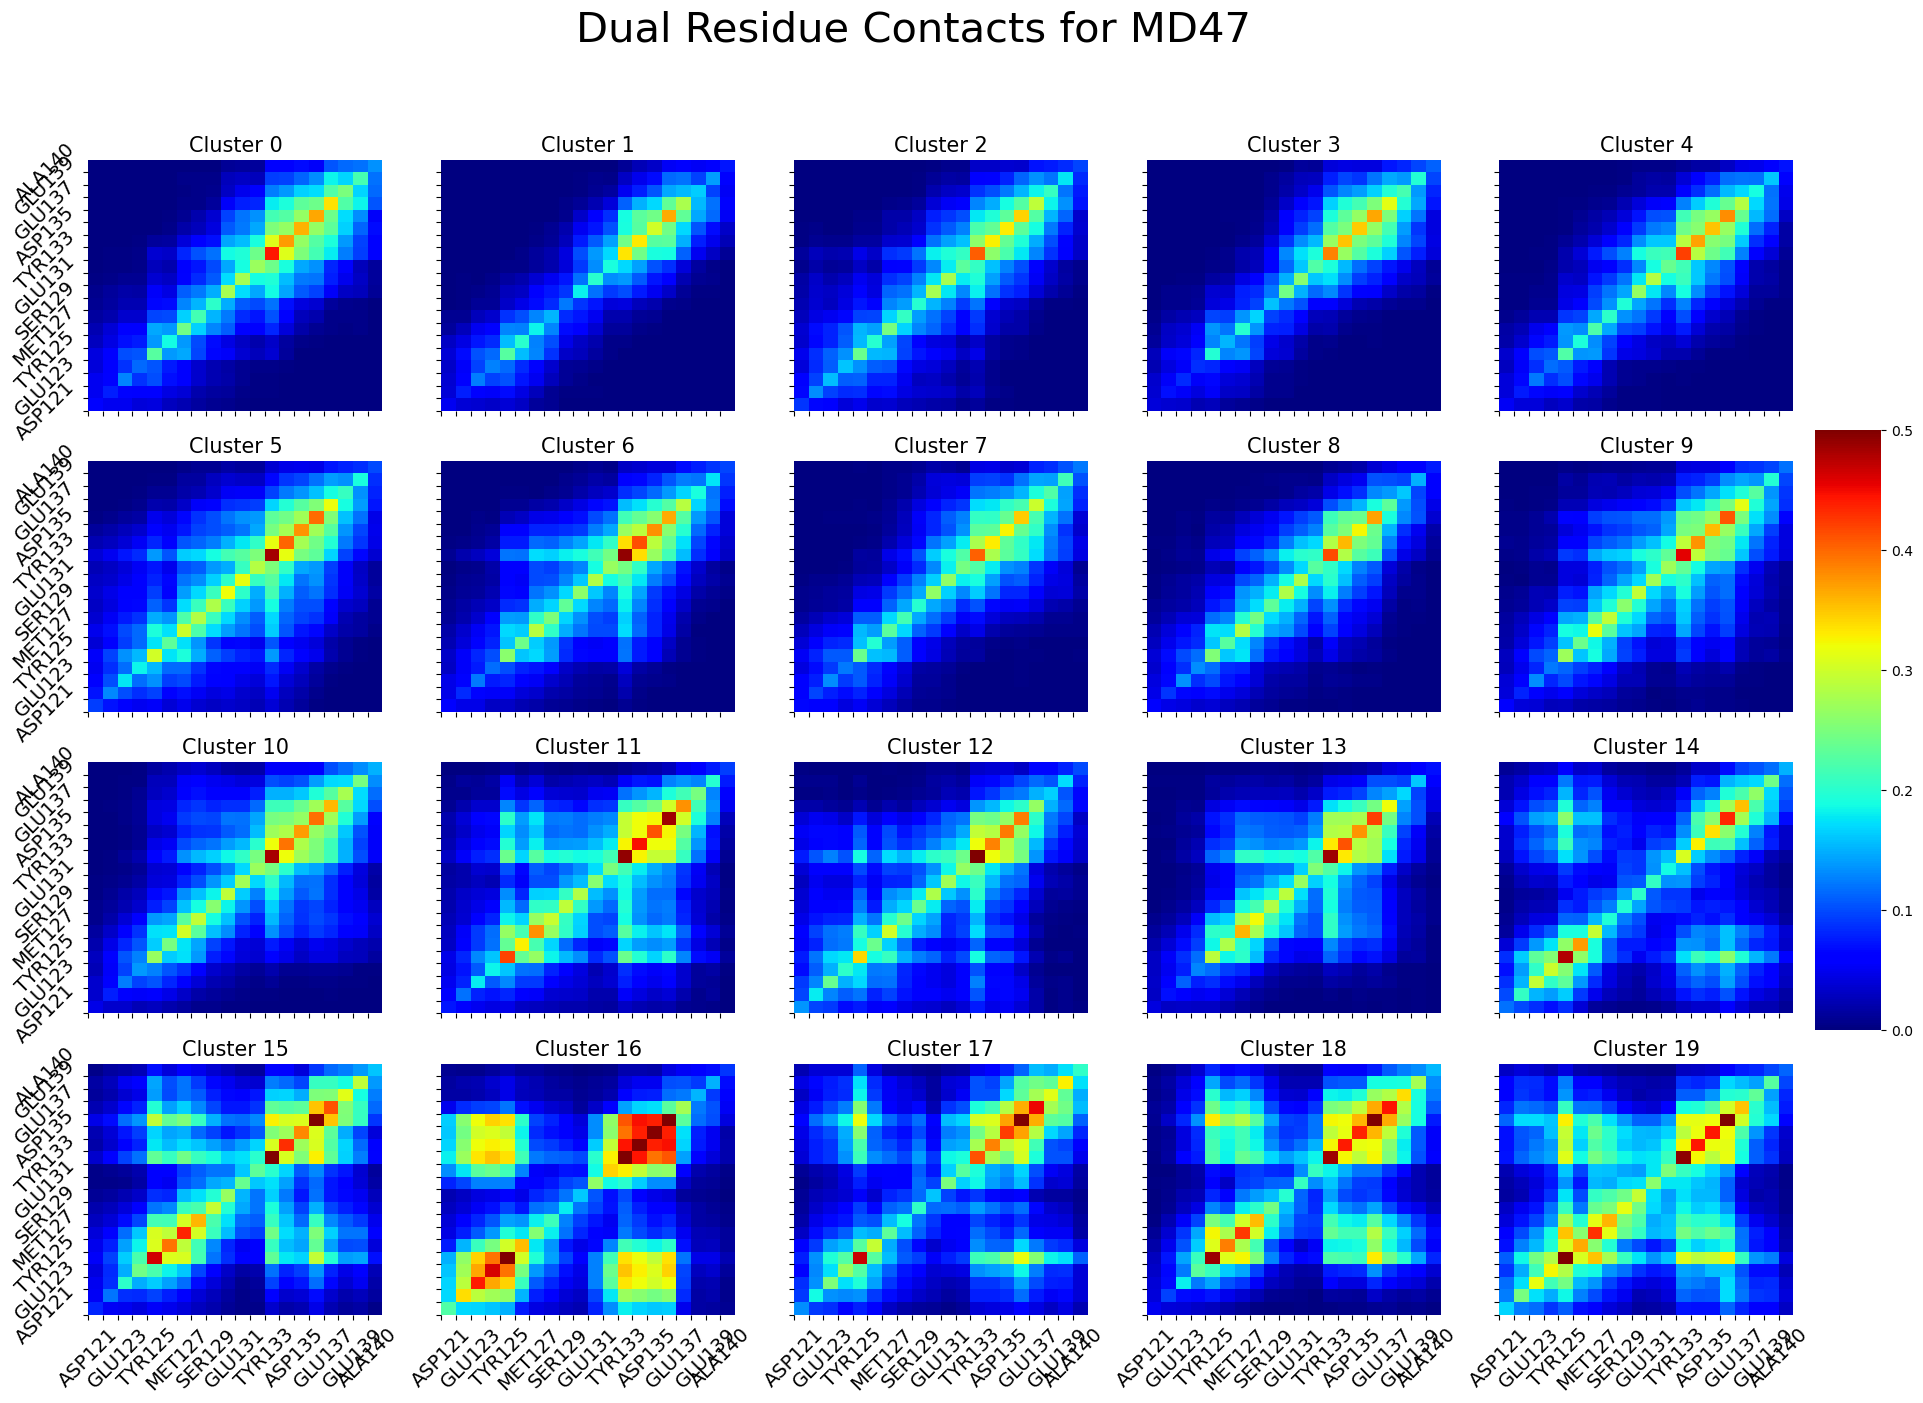

In [15]:
plot_dualres(f'{rundir}/MD47')

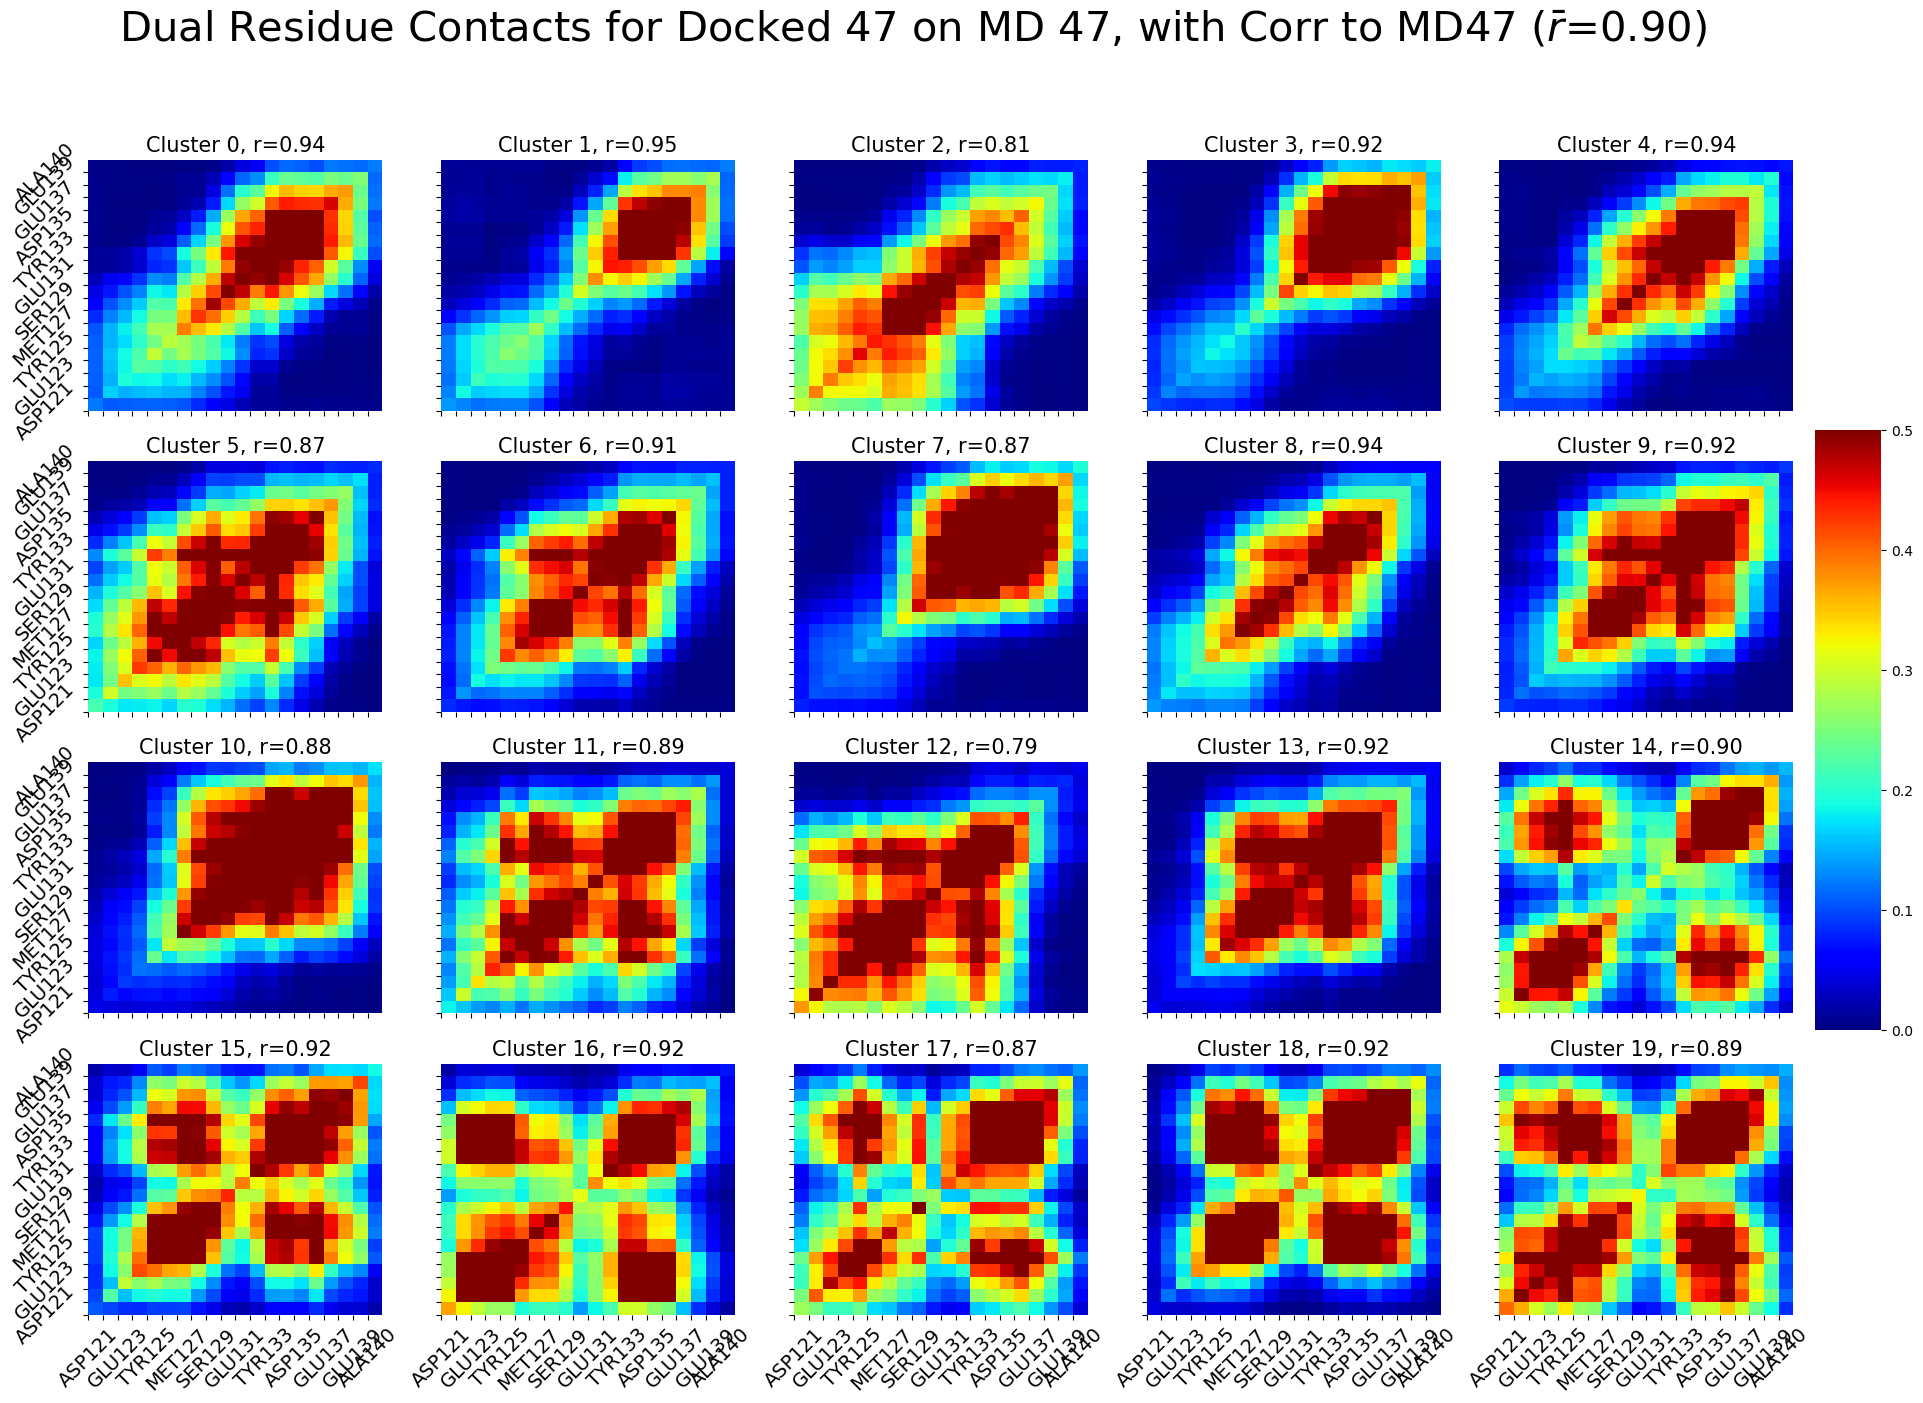

In [16]:
plot_dualres_corr(f'{rundir}/47on47bf', f'{rundir}/MD47')

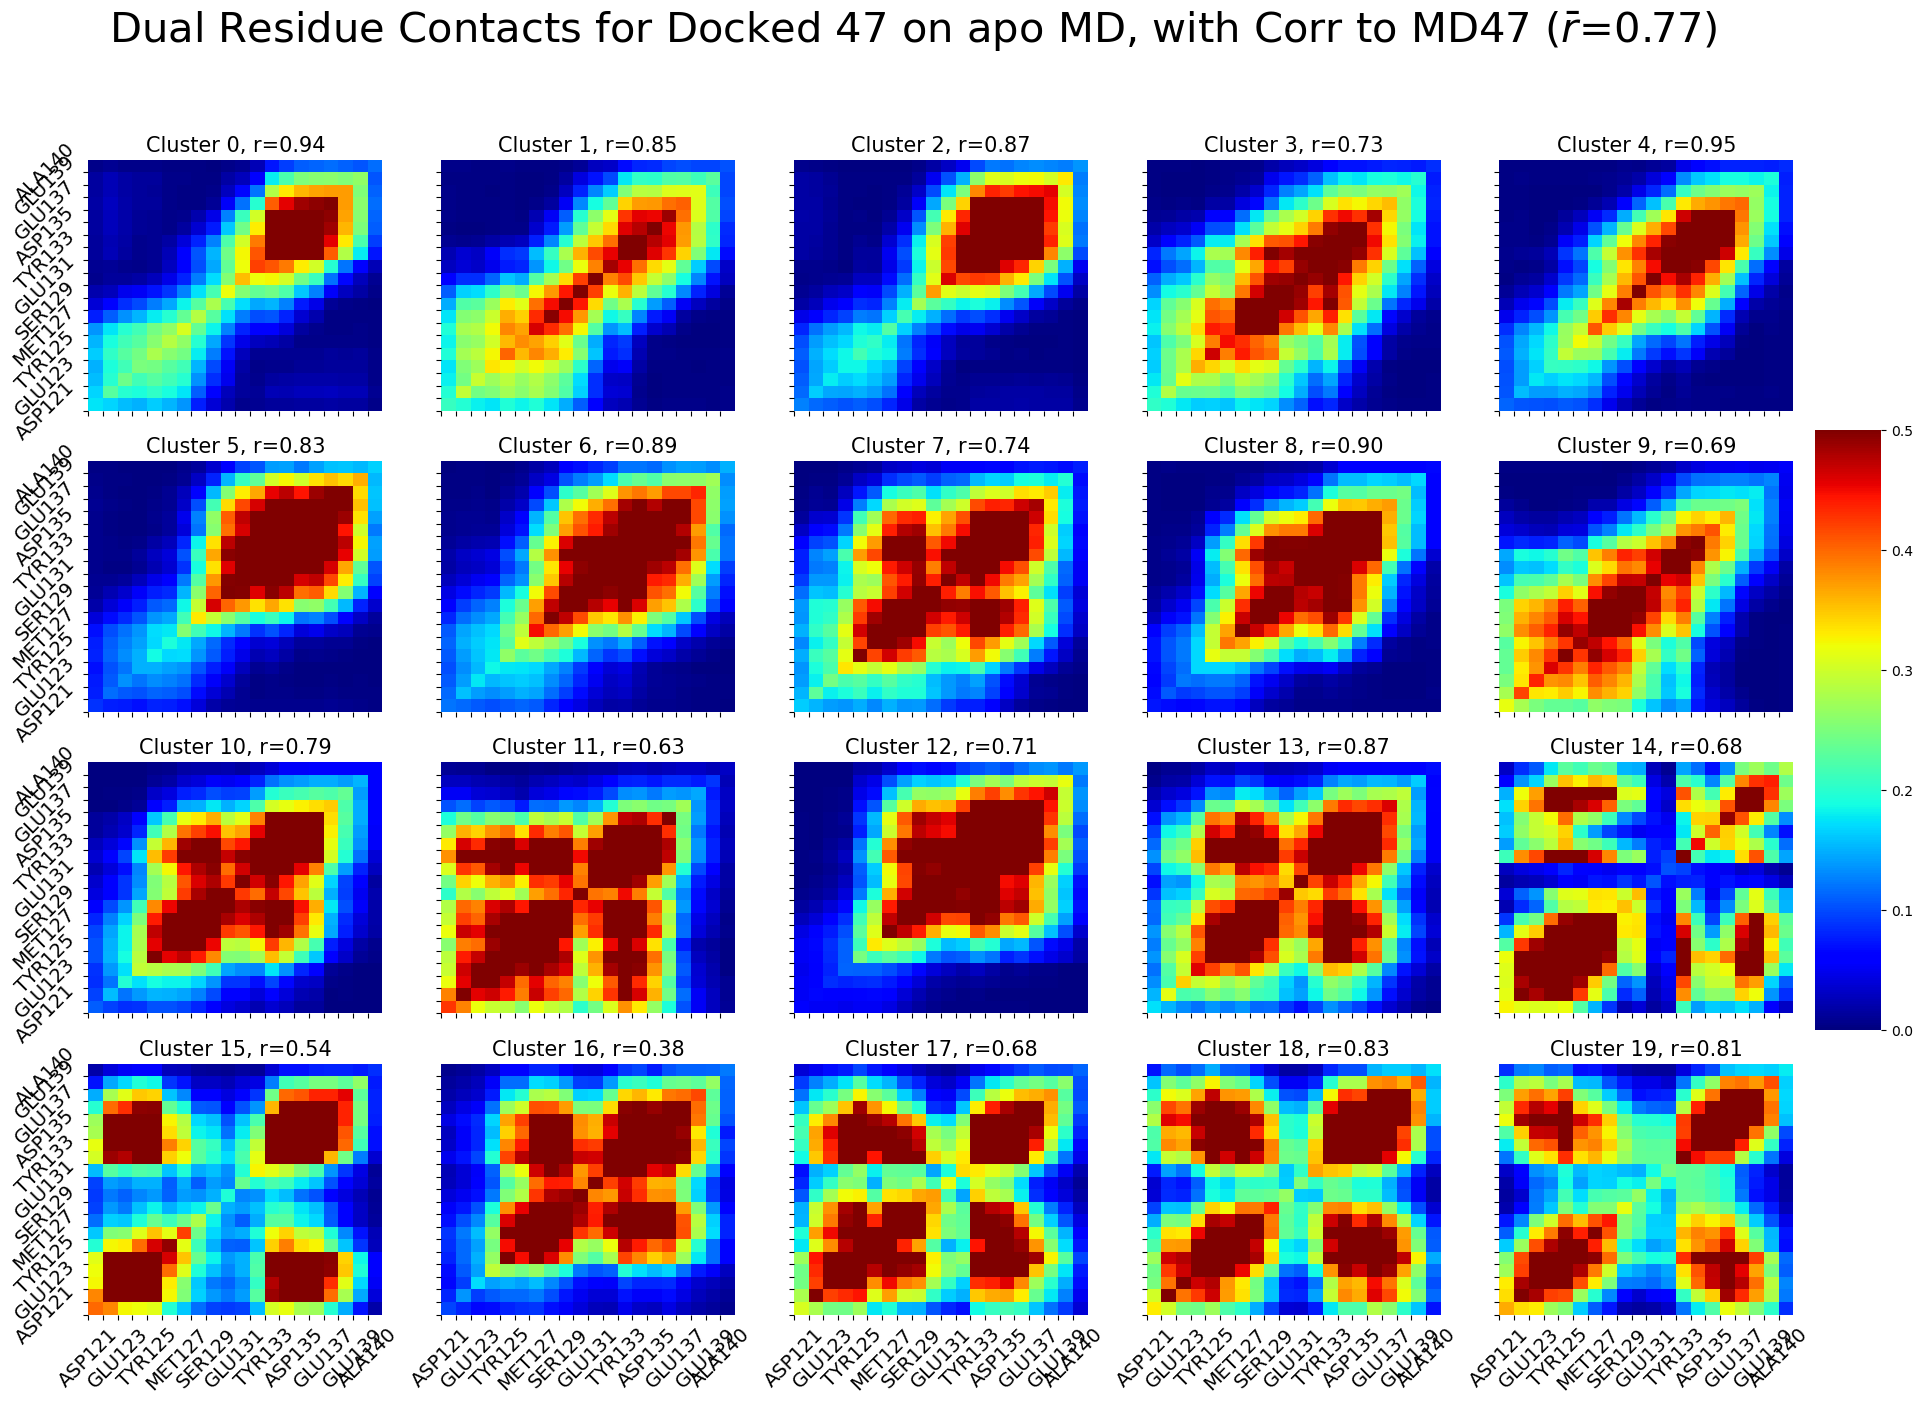

In [17]:
plot_dualres_corr(f'{rundir}/47onapo', f'{rundir}/MD47')

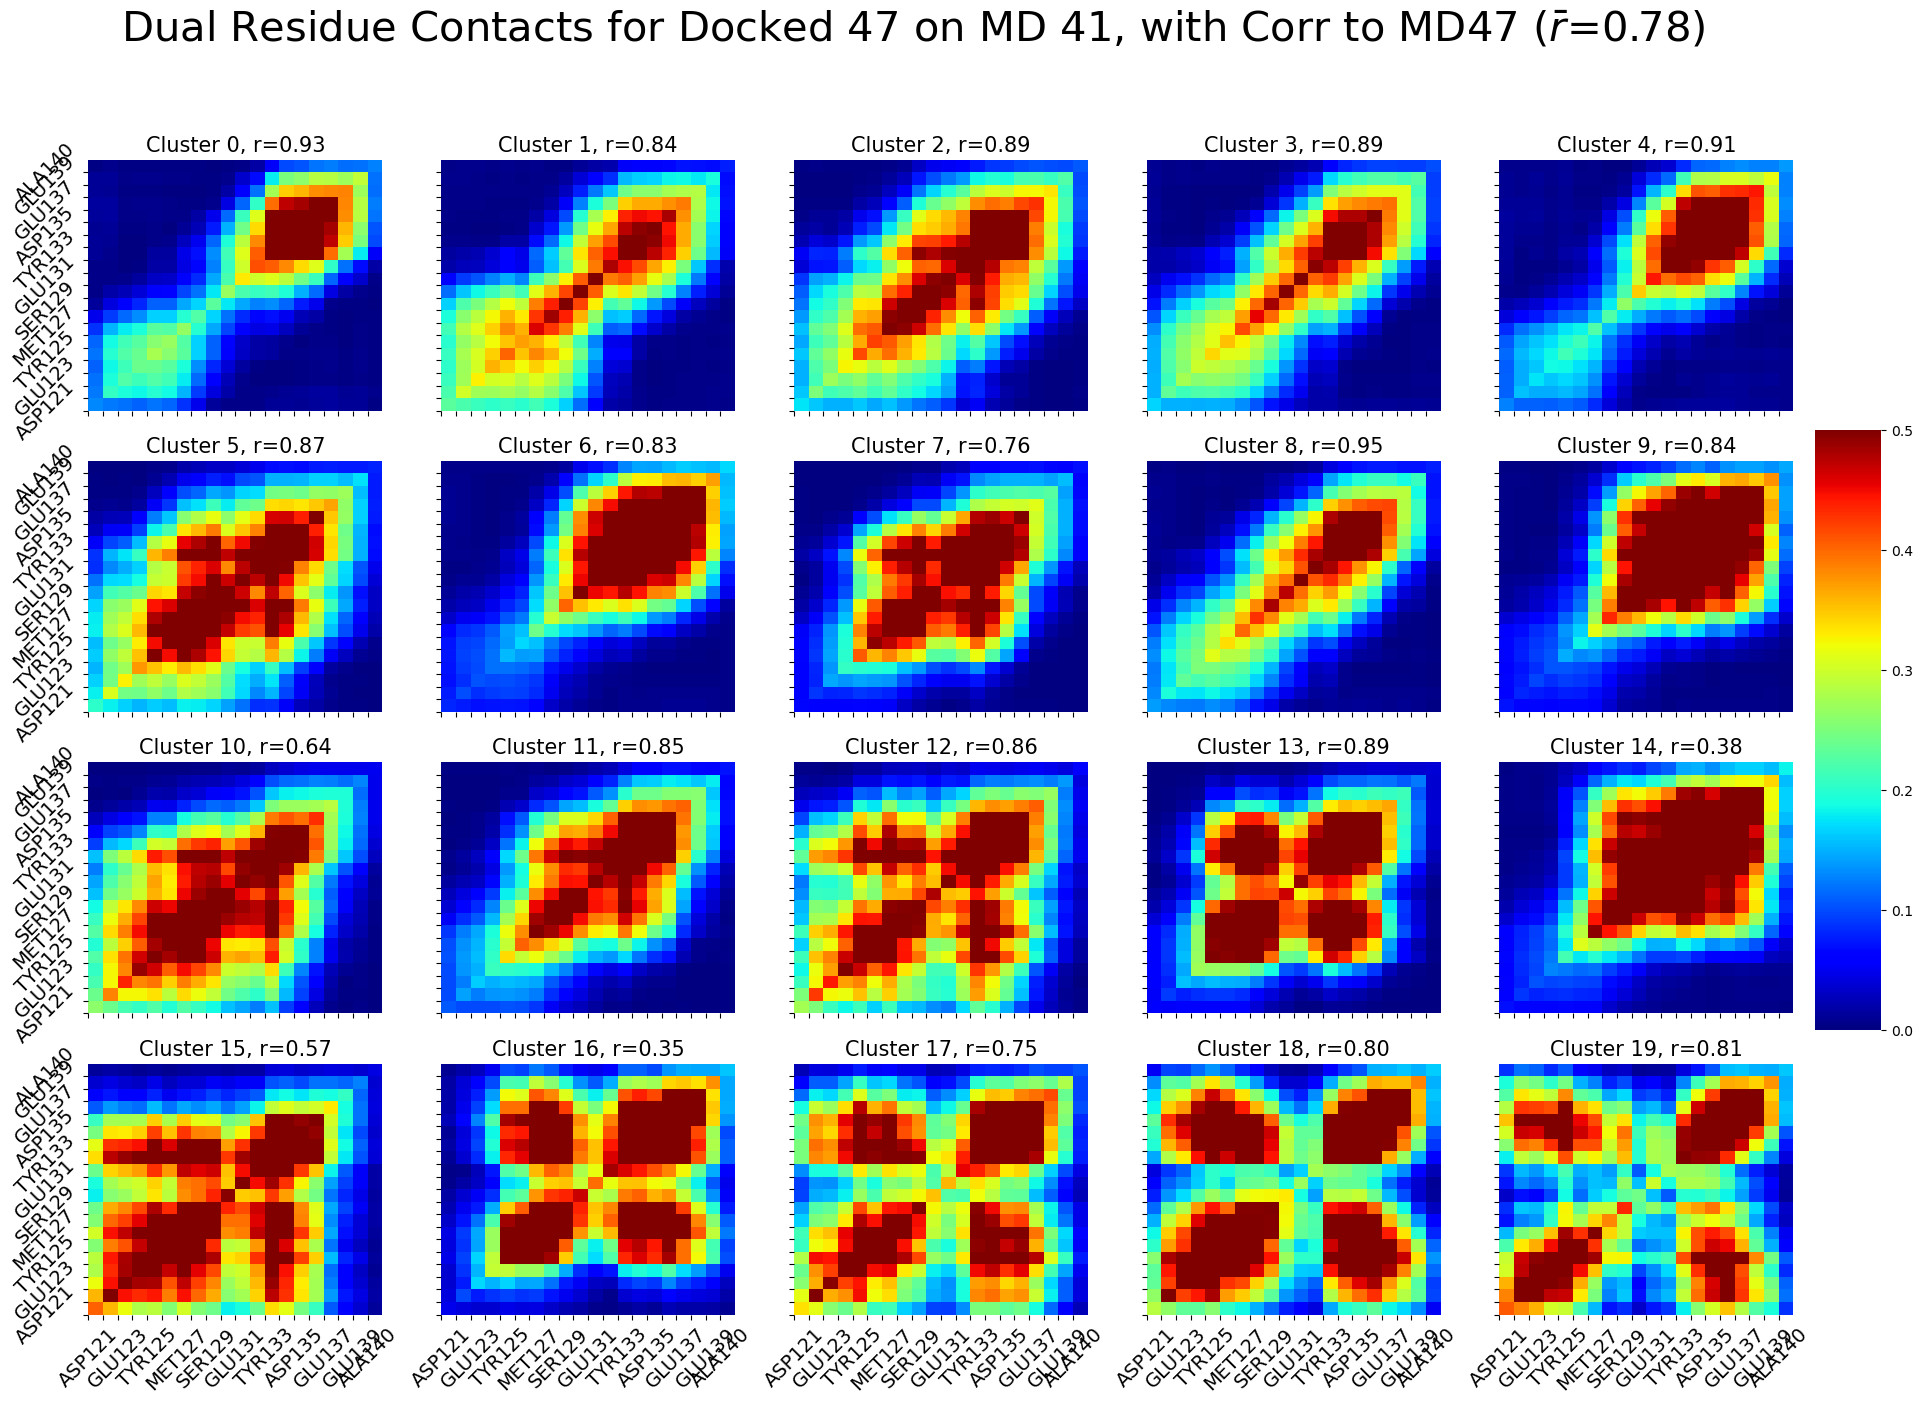

In [18]:
plot_dualres_corr(f'{rundir}/47on41bf', f'{rundir}/MD47')